# Assignment02 - Python and Plotting

This assignment will explore the plotting capabilites of python. It will be using the following data:
- `london-rain-clean.csv` from assignment01 (you will need to add it to the repository or read from your assignment01 directory)
- `temperature.csv` included in repository

It is assumed that you have removed any data with missing values in `london-rain-clean.csv` but that does not mean the data is free of errors.

- <span style="color:red">**Convert the following cell to markdown and write a few sentances about what could be other sources of error in the dataset.**</span>

Could have nonphysical data/noise. Do not have uncertainties on measurements. Can only calculate variance in dataset. i.e. The sensors themselves have an unknown precision. Do not have actual location data, cannot to track features in observed data based on location. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

- <span style="color:red">**Write the required python code to load the `london-rain-clean.csv` data.**</span>

In [ ]:
df = pd.read_csv('~/csci627-assignment01-eparrish64/london-rain.csv', sep=',', header=None)
df.columns = ["site","variable","date","value","units","type"]
# df = df.drop(0)
# type(df.value)
# print(df.value)
df = df[df.value>=0]
df.dropna(inplace=True)
# df.describe()
df.head()

In [ ]:
# df.drop(df[df.value < 0].index(), inplace=True)
# df[df.value<0].index()

df.describe()

- <span style="color:red">**Write the required python code to produce a simple plot, this should be one line of python code in your jupyter cell, plus some magic.**</span>

In [ ]:
# df.date = pd.to_datetime(df.date)
df.plot(pd.to_datetime(df.date),'value',style='o')

- <span style="color:red">**Write a short summary of what you see and what initial thoughts you have about the data. (You will need to convert the cell below to a markdown cell)**</span>

There appear to be a lot of zeros away from the main cluster of data. I think it would be interesting to see what happens when you zero supress the data. Or, even just zoom the x axis in on the peak.

Detection of outliers is an art and there is no set standard method as it is very data dependent.  For the purpose of this assignment, you will be looking at rainfall data and you bring a basic understanding of how rain works, what is reasonable and what is not. We will use 2 standard deviations from the mean as our first filter point.

- <span style="color:red">**Write the required python code to calculate the mean and standard deviation for the *value* variable from the rain dataset.**</span>

In [ ]:
rain_mean = df.value.mean()
rain_std = df.value.std()
print(rain_mean, rain_std)

In [ ]:
lower_bound = rain_mean - (2*rain_std)
upper_bound = rain_mean + (2*rain_std)

- <span style="color:red">**Write the required python code to plot rain values with data filtered out using your lower and upper bounds.**</span>

In [ ]:
df_filtered = df[(df.value > lower_bound) & (df.value < upper_bound)]
df.describe()

In [ ]:
df_filtered.plot('date','value',style='o',ms=3)

- <span style="color:red">**Write a short summary of what you see and your revised thoughts about the data. Does the data seem more reasonable now that you have filtered the data? (You will need to convert the cell below to a markdown cell)**</span>

With the y axis at a more reasonable value, the data that looked like zeros now show more structure.

- <span style="color:red">**Modify your python code to increase the size of your figure to (20,10).**</span>

In [ ]:
df_filtered.plot('date','value',style='o',ms=8,figsize=(20,10))

- <span style="color:red">**If the larger graph helps you see anything new in your data, write a short summary (you will need to convert the cell below to a markdown cell), if not leave the cell blank.**</span>

- <span style="color:red">**If you are happy with your visualization, then we can move on, if not modify your code one last time to fix any other concerns you may have in terms of data values captured in the visualization that should not be there.**</span>

In [ ]:
ax0 = df_filtered.plot('date','value',style='o',ms=8,figsize=(20,10),clip_on=False)
ax0.set(xlabel='date',ylabel='Temperature [C]')

Please note, this is **not a final visualization** of the London rain data, there are numerous things still wrong with the graph if you followed the directions, the graph will be missing title, labels and even the bars are somewhat misleading. This assignment was intended to introduce you to the use of graphing in debugging/cleaning of your data.

We will now switch to a clean dataset for rest of the lesson.  You do not need to worry about data quality here, this portion of the assigment will focus on ensuring you understand how to code for additional required components in a final visualization.

- <span style="color:red">**Write the needed python code to load the `temperature.csv` file into a pandas dataframe.**</span>

In [2]:
df2 = pd.read_csv('temperature.csv', sep=',')

In [3]:
# df2.columns = ['date','nodeid','temperature']
# df2 = df2.drop(0)
df2.date = pd.to_datetime(df2.date)
df2.temperature = pd.to_numeric(df2.temperature)

In [4]:
df2.describe()
# df2.head()
# print(df2.temperature)

,temperature
count,940312.000000
mean,39.290672
std,12.962963
min,15.800000
25%,27.200000
50%,35.300000
75%,51.300000
max,68.500000


- <span style="color:red">**Write the needed python code to plot the temperature of the dataframe. You should be able to do this in a single line of python code.**</span>

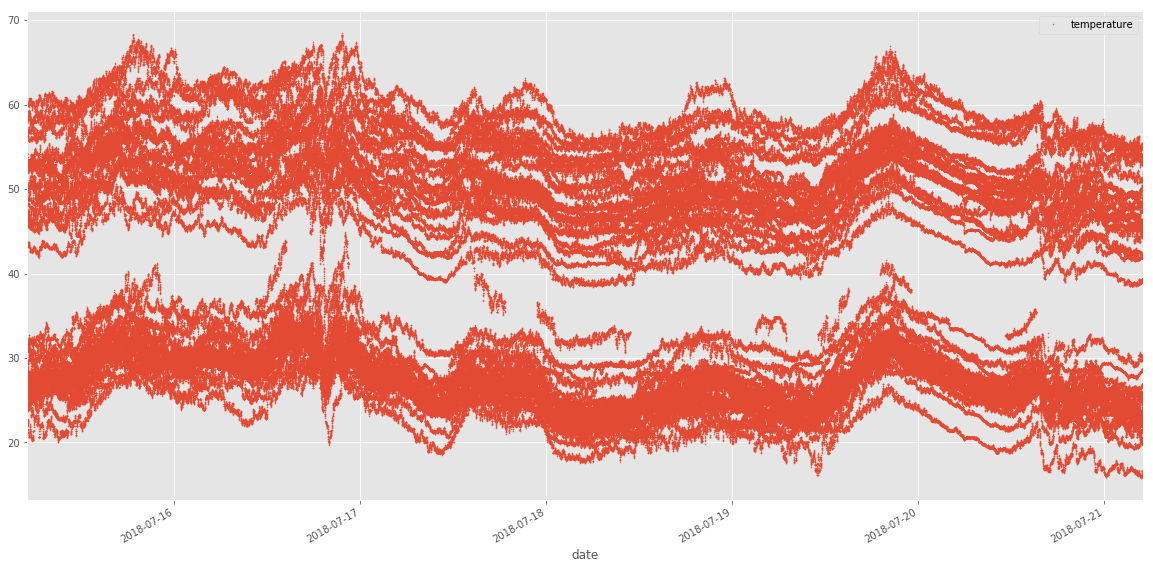

In [5]:
df2.plot('date','temperature',style='o',ms=.5,figsize=(20,10))

- <span style="color:red">**Convert the following cell to markdown and describe what you see and any issues you have with this initial visualization.**</span>

No y axis label, units, no title (in my field titles are never used. The visualization should be easy enough to understand and the axes are labelled such that a title is just redundant). I'm not a huge fan of the marker style and size. The plot looks too busy to easily grasp the point. Would be cleaner to look at individual nodes and use some kind of mean when looking at all nodes. I would also prefer if the y axis had a minimum of 0 to provide a visual reference and allow for easy comparison to othet nodes.

- <span style="color:red">**Write the needed python code to plot the temperature values of a single node from the dataframe. You should be able to do this in a single line of python code.**</span>

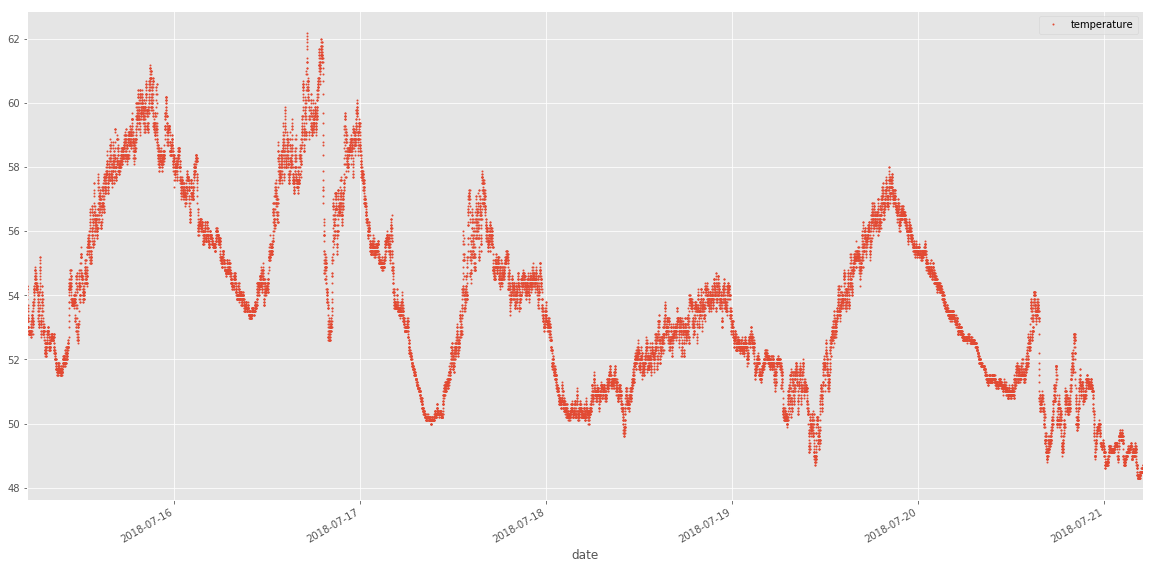

In [6]:
# df2.groupby(df2.nodeid).date #,df2.groupby(df2.nodeid).temperature
df2.loc[df2['nodeid'] == "001e061144c0"].plot('date','temperature',style='o',ms=1,figsize=(20,10))

- <span style="color:red">**Convert the following cell to markdown and describe what new insight you have gained about the `temperature.csv` dataset.**</span>

The smaller fluctuations are now much easier to see. The plot itself is mucg easieer to see and understand what it is showing.

- <span style="color:red">**You are now assigned the task of producing a single visualization of a node from the temperature.csv dataset, write the needed python code to produce a visualization that is (20, 10) in size, you only need to worry about producing the visualization in the next cell, addtional components such as title and labels will follow in future questions.**</span> (Hint: This will require more code than past plots and you need to think about the final visualization in terms of what is useful to your viewer in understanding the data. Again don't worry about titles and labels at this point.)

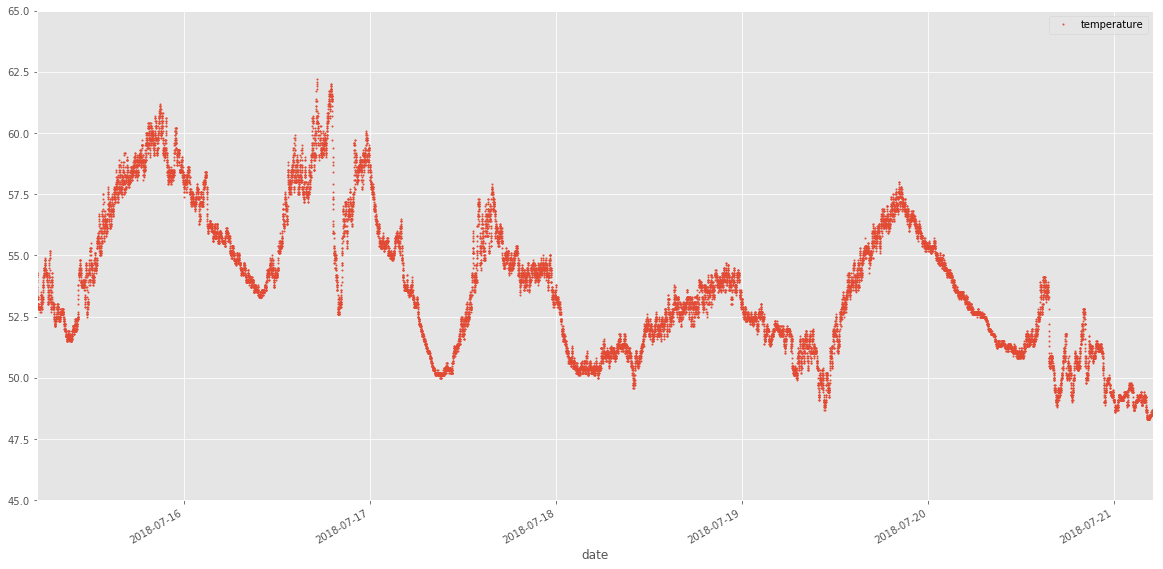

In [7]:
ax = df2.loc[df2['nodeid'] == "001e061144c0"].plot('date','temperature',style='o',ms=1,figsize=(20,10),ylim=(45,65))
# ax.set_ylim(45,65)

- <span style="color:red">**Write the needed python code to add the following title "Temperature Values for Node &lt;node used in visualization&gt;" to your previous plot.**</span>

In [8]:
ax.set(title="Temperature Values for Node 001e061144c0")

[Text(0.5, 1.0, 'Temperature Values for Node 001e061144c0')]

- <span style="color:red">**Write the needed python code to add the following labels "Temperature (C)" to your y-axis and the appropriate label to your x-axis code from previous plot.**</span>

In [9]:
ax.set(xlabel="Date",ylabel="Temperature [C]")

[Text(3.200000000000017, 0.5, 'Temperature [C]'),
 Text(0.5, 20.200000000000003, 'Date')]

- <span style="color:red">**The plot should nearly be complete now, using the code from your previous plot, write the needed python code to remove the legend.**</span>

In [10]:
ax.get_legend().remove()

- <span style="color:red">**Using your code from your final plot above, add the needed python code to save the final visualization to a PNG file with the filename "FinalVis".**</span>

In [11]:
ax.get_figure().savefig("FinalVis.png")

- <span style="color:red">**BONUS QUESTION: Write the required python code to display the temperature value for all the nodes on a single plot. Hint: Use the alpha component to make lines semi-transparent to help with readability (alpha=0.05)**</span>

The first attempt works, but does not put the nodeid in the legend.

The second attempt should have the correct labels, but I have not had this finish yet. 
Seems very computationally expensive.

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs


nodeid
001e06109416    AxesSubplot(0.125,0.2;0.775x0.68)
001e06109f62    AxesSubplot(0.125,0.2;0.775x0.68)
001e0610b9e9    AxesSubplot(0.125,0.2;0.775x0.68)
001e0610ba16    AxesSubplot(0.125,0.2;0.775x0.68)
001e0610ba46    AxesSubplot(0.125,0.2;0.775x0.68)
001e0610ba8f    AxesSubplot(0.125,0.2;0.775x0.68)
001e0610bbf9    AxesSubplot(0.125,0.2;0.775x0.68)
001e0610bbff    AxesSubplot(0.125,0.2;0.775x0.68)
001e0610bc10    AxesSubplot(0.125,0.2;0.775x0.68)
001e0610bc12    AxesSubplot(0.125,0.2;0.775x0.68)
001e0610e532    AxesSubplot(0.125,0.2;0.775x0.68)
001e0610e537    AxesSubplot(0.125,0.2;0.775x0.68)
001e0610e540    AxesSubplot(0.125,0.2;0.775x0.68)
001e0610e809    AxesSubplot(0.125,0.2;0.775x0.68)
001e0610e835    AxesSubplot(0.125,0.2;0.775x0.68)
001e0610ee33    AxesSubplot(0.125,0.2;0.775x0.68)
001e0610ee36    AxesSubplot(0.125,0.2;0.775x0.68)
001e0610ee41    AxesSubplot(0.125,0.2;0.775x0.68)
001e0610ee43    AxesSubplot(0.125,0.2;0.775x0.68)
001e0610ee5d    AxesSubplot(0.125,0.2;0.775

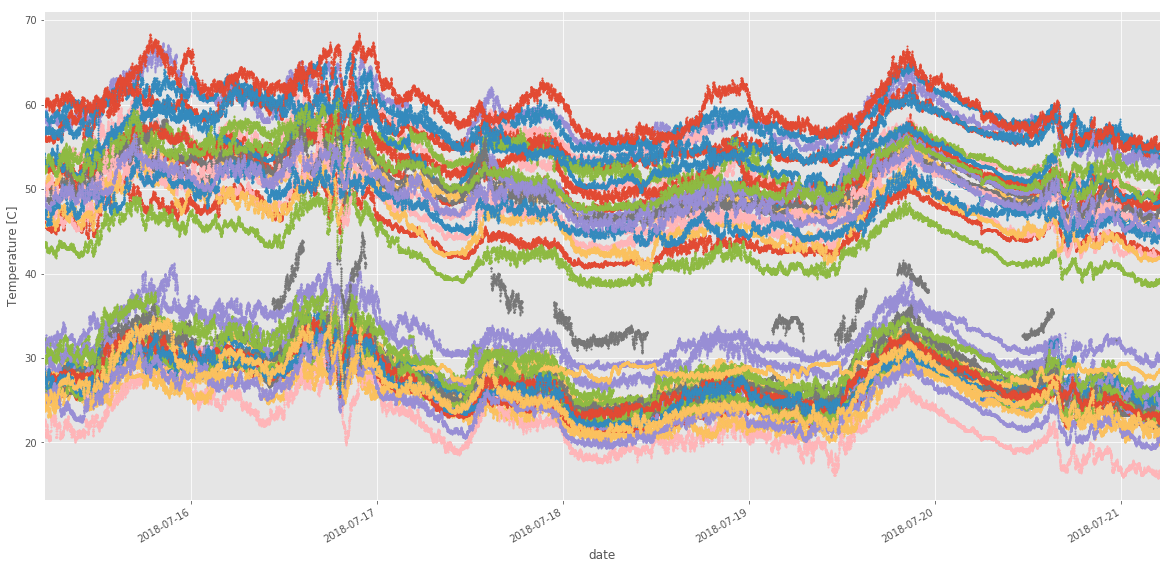

In [13]:
%time
fig2, ax2 = plt.subplots(figsize=(20,10))
ax2.set(xlabel="Date",ylabel="Temperature [C]")
df2.groupby(df2.nodeid).plot('date','temperature',style='o',ms=1,figsize=(20,10),ax=ax2,legend=False)

In [14]:
ax2.get_figure().savefig("BonusVis.png")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


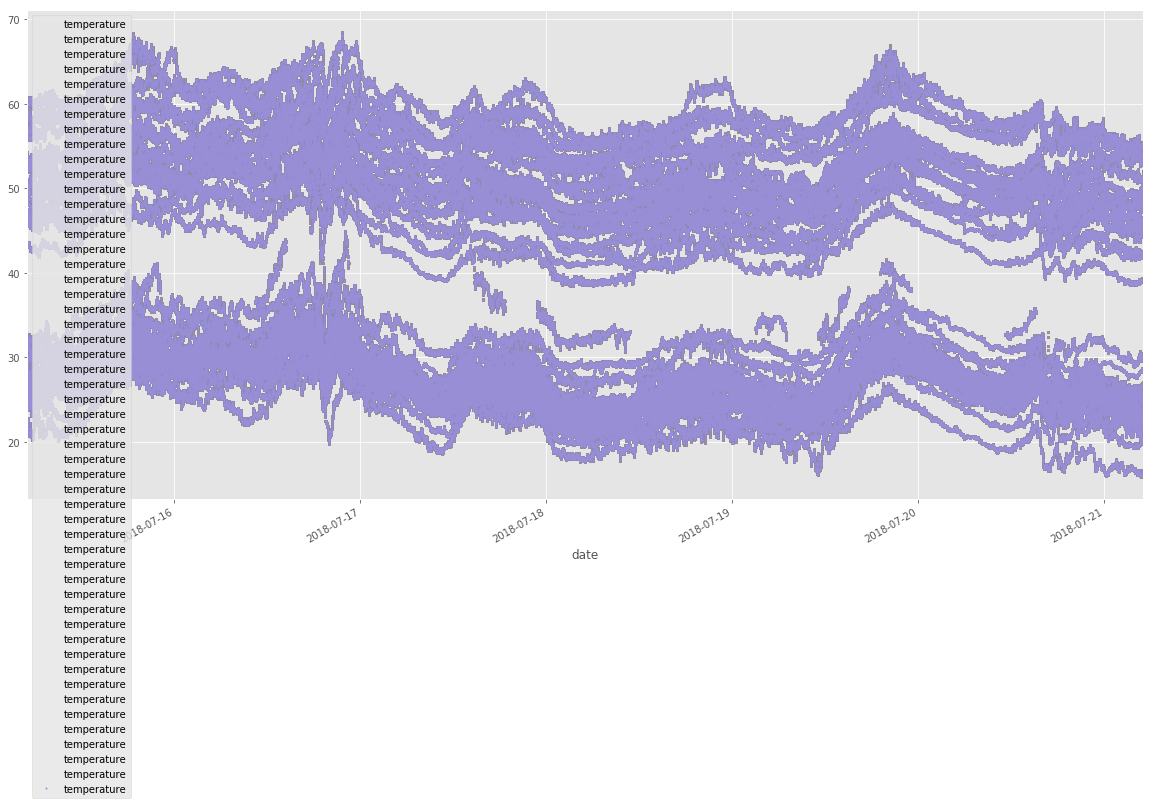

In [15]:
%time
fig3, ax3 = plt.subplots(figsize=(20,10))
for label,df in df2.groupby(df2.nodeid):
    df2.plot('date','temperature',style='o',ms=1,ax=ax3)

In [16]:
ax3.get_figure().savefig("BonusVis2.png")